# **Advanced Sentiment Analysis**

**Background**

In this Notebook we will start from the Tweet Posts file and filter on the two particular Brands from the Kering group that we want to analyze: Gucci and McQueen. We will compare with advanced Natural Language Processing the Storytelling of these two Brands. We will also study the difference between Twitter and TikTok communication for one of the two brands: Gucci. Let's begin!

**Dataset** 

We will use Tweet Posts Dataset from the Sentiment Analysis and Storytelling Network. At the same time, we will also scrape TikTok descriptions with an online scraping tool.

**Resources**
*   TikTok scraping: https://stevesie.com/apps/tiktok-api
*   LDA Topic Modelling: https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05 - 
https://lazarinastoy.com/topic-modelling-lda/ - https://radimrehurek.com/gensim/models/ldamodel.html

*   YouTube: https://www.youtube.com/watch?v=TKjjlp5_r7o




## **1.   Introduction: Importing libraries and load Tweet Posts**

In [1]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook

import pandas as pd
pd.set_option('display.max_colwidth', None) #to see more text
import json 
import csv
from datetime import date
from datetime import datetime
import time
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()

from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import string
import itertools
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/path/to/data'

Mounted at /content/gdrive


In [3]:
# Load and get only Gucci and McQueen Tweets + only the relevent columns
dftweets = pd.read_csv('/content/gdrive/MyDrive/Final Project/2. Sentiment Analysis/Tweet_Posts.csv')
dftweets = dftweets[(dftweets['brand']=='Gucci') | (dftweets['brand']=='McQueen')]
dftweets = dftweets.iloc[:, [2,3,4,5,9,10,11,12,13,14,15,16]]
dftweets['brand'].value_counts()

Gucci      3250
McQueen    3250
Name: brand, dtype: int64

In [4]:
# Inspect our data
dftweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 39217 to 47508
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6500 non-null   object 
 1   id            6500 non-null   int64  
 2   created_at    6500 non-null   object 
 3   text          6497 non-null   object 
 4   subjectivity  6500 non-null   float64
 5   polarity      6500 non-null   float64
 6   nb_words      6500 non-null   int64  
 7   text_len      6500 non-null   int64  
 8   negative      6500 non-null   float64
 9   neutral       6500 non-null   float64
 10  positive      6500 non-null   float64
 11  compound      6500 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 660.2+ KB


In [5]:
# Tweets should already being clean but we have 3 NaN texts so let's clean them
dftweets['text'] = dftweets['text'].replace(np.nan, '')
dftweets['text'] = dftweets['text'].astype(str)
dftweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 39217 to 47508
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6500 non-null   object 
 1   id            6500 non-null   int64  
 2   created_at    6500 non-null   object 
 3   text          6500 non-null   object 
 4   subjectivity  6500 non-null   float64
 5   polarity      6500 non-null   float64
 6   nb_words      6500 non-null   int64  
 7   text_len      6500 non-null   int64  
 8   negative      6500 non-null   float64
 9   neutral       6500 non-null   float64
 10  positive      6500 non-null   float64
 11  compound      6500 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 660.2+ KB


## **2.   Wordcloud Representation**

<function matplotlib.pyplot.show>

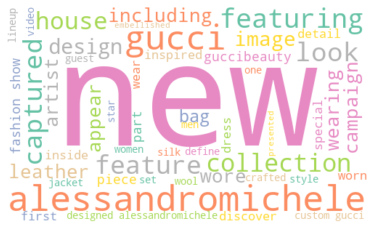

In [10]:
# Plot the McQueen Word Cloud
allWords = ' '.join( [twts for twts in dftweets[dftweets['brand']=='Gucci']['text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_words = 50,
                      background_color='white', colormap='Set2', max_font_size = 200).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

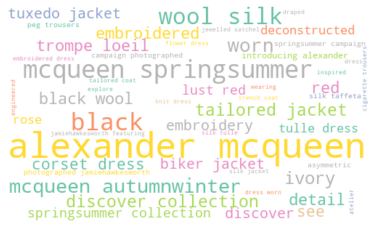

In [11]:
# Plot the McQueen Word Cloud
allWords = ' '.join( [twts for twts in dftweets[dftweets['brand']=='McQueen']['text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_words = 50,
                      background_color='white', colormap='Set2', max_font_size = 200).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

## **3.   Sentiment Analysis extension**

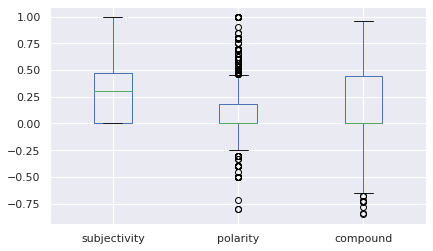

In [12]:
# Distribution of TextBlob and VADER metrics for Gucci 
dftweets[dftweets['brand']=='Gucci'][['subjectivity', 'polarity', 'compound']].plot(kind='box')

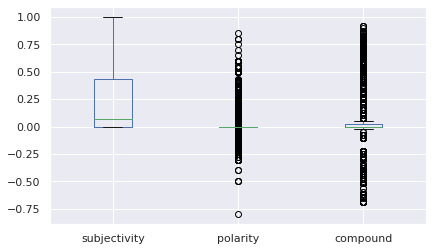

In [13]:
# Distribution of TextBlob and VADER metrics for Gucci 
dftweets[dftweets['brand']=='McQueen'][['subjectivity', 'polarity', 'compound']].plot(kind='box')

In [14]:
# Create a function to compute the negative, neutral and positive analysis
def getTextBlobAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

dftweets['textblob_analysis'] = dftweets['polarity'].apply(getTextBlobAnalysis)

# Show the dataframe
dftweets.head()

,brand,id,created_at,text,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound,textblob_analysis
39217,Gucci,1458706068046065664,2021-11-11 08:00:02,minashin joins as new gucci global brand ambassador here the actress appears in a series of images wearing key p,0.484848,0.045455,20,113,0.0,1.0,0.0,0.0,Positive
39218,Gucci,1458675864183484419,2021-11-11 06:00:01,joining gucci as new global brand ambassador is actress minashin captured by janghyunhong mina wears key looks,0.484848,0.045455,17,111,0.0,1.0,0.0,0.0,Positive
39219,Gucci,1458226659363106816,2021-11-10 00:15:02,at the london premiere of and pinault all wore looks by gucci,0.000000,0.000000,12,64,0.0,1.0,0.0,0.0,Neutral
39220,Gucci,1458166930389483522,2021-11-09 20:17:42,captured at s tenth annual artfilm gala marcobizzarri michael govan amy sherald alessandromichele,0.000000,0.000000,13,98,0.0,1.0,0.0,0.0,Neutral
39221,Gucci,1458166115956404229,2021-11-09 20:14:28,the obama portraits features paintings of president barack obama and first lady michelle obama by kehinde wiley a,0.333333,0.250000,18,114,0.0,1.0,0.0,0.0,Positive


In [15]:
# Create a function to compute the VADER compound analysis
def getVaderAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

dftweets['vader_analysis'] = dftweets['compound'].apply(getVaderAnalysis)

# Show the dataframe
dftweets.head()

,brand,id,created_at,text,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound,textblob_analysis,vader_analysis
39217,Gucci,1458706068046065664,2021-11-11 08:00:02,minashin joins as new gucci global brand ambassador here the actress appears in a series of images wearing key p,0.484848,0.045455,20,113,0.0,1.0,0.0,0.0,Positive,Neutral
39218,Gucci,1458675864183484419,2021-11-11 06:00:01,joining gucci as new global brand ambassador is actress minashin captured by janghyunhong mina wears key looks,0.484848,0.045455,17,111,0.0,1.0,0.0,0.0,Positive,Neutral
39219,Gucci,1458226659363106816,2021-11-10 00:15:02,at the london premiere of and pinault all wore looks by gucci,0.000000,0.000000,12,64,0.0,1.0,0.0,0.0,Neutral,Neutral
39220,Gucci,1458166930389483522,2021-11-09 20:17:42,captured at s tenth annual artfilm gala marcobizzarri michael govan amy sherald alessandromichele,0.000000,0.000000,13,98,0.0,1.0,0.0,0.0,Neutral,Neutral
39221,Gucci,1458166115956404229,2021-11-09 20:14:28,the obama portraits features paintings of president barack obama and first lady michelle obama by kehinde wiley a,0.333333,0.250000,18,114,0.0,1.0,0.0,0.0,Positive,Neutral


In [16]:
# Define separated Gucci and Mcqueen Datasets
dftweets_gucci = dftweets[dftweets['brand']=='Gucci']
dftweets_mcqueen = dftweets[dftweets['brand']=='McQueen']

[Text(0, 0.5, 'Compound'), Text(0.5, 0, 'Polarity')]

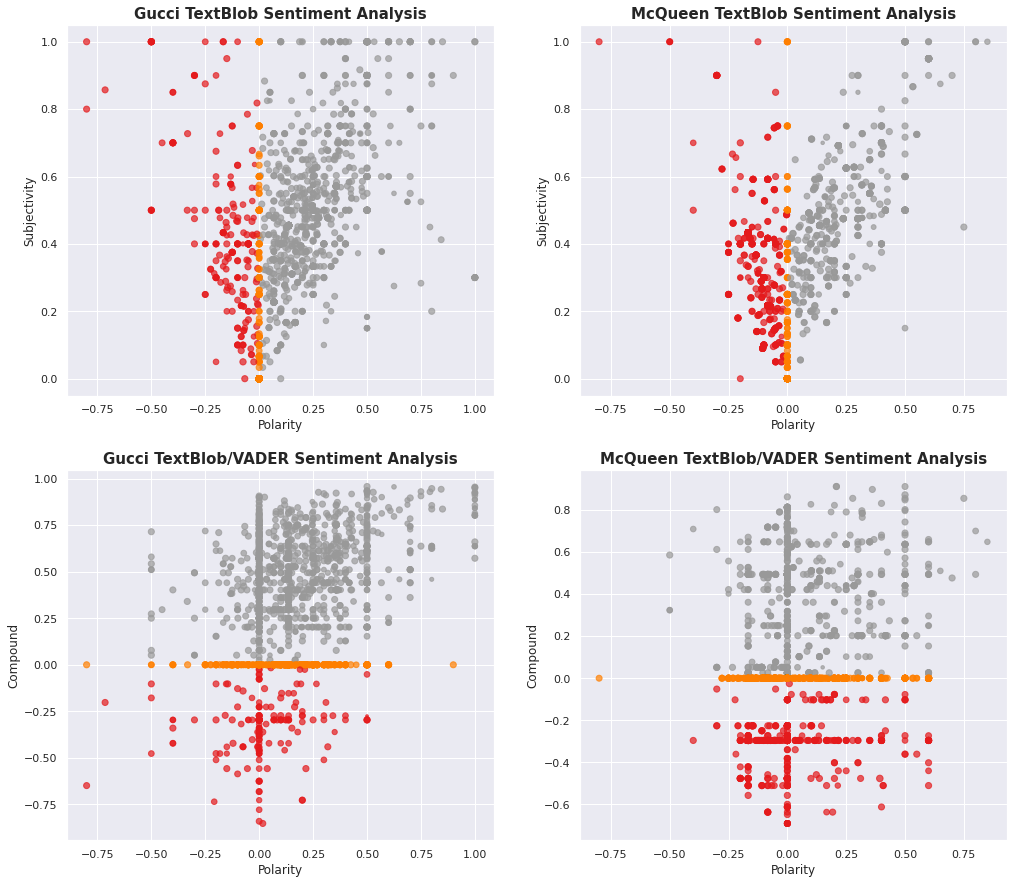

In [17]:
# Scatter plot of Sentiment and Intensity of Gucci and McQueen using TextBlob and VADER
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,15)

axs[0, 0].scatter(x = dftweets_gucci['polarity'], y = dftweets_gucci['subjectivity'], 
            s=dftweets_gucci['text_len']/3, c=dftweets_gucci['textblob_analysis'].astype('category').cat.codes,
            cmap='Set1', alpha=0.7)
axs[0, 0].set_title('Gucci TextBlob Sentiment Analysis', fontweight ='bold', size=15)
axs[0, 0].set(xlabel='Polarity', ylabel='Subjectivity')

axs[0, 1].scatter(x = dftweets_mcqueen['polarity'], y = dftweets_mcqueen['subjectivity'], 
            s=dftweets_mcqueen['text_len']/3, c=dftweets_mcqueen['textblob_analysis'].astype('category').cat.codes,
            cmap='Set1', alpha=0.7)
axs[0, 1].set_title('McQueen TextBlob Sentiment Analysis', fontweight ='bold', size=15)
axs[0, 1].set(xlabel='Polarity', ylabel='Subjectivity')

axs[1, 0].scatter(x = dftweets_gucci['polarity'], y = dftweets_gucci['compound'], 
            s=dftweets_gucci['text_len']/3, c=dftweets_gucci['vader_analysis'].astype('category').cat.codes,
            cmap='Set1', alpha=0.7)
axs[1, 0].set_title('Gucci TextBlob/VADER Sentiment Analysis', fontweight ='bold', size=15)
axs[1, 0].set(xlabel='Polarity', ylabel='Compound')

axs[1, 1].scatter(x = dftweets_mcqueen['polarity'], y = dftweets_mcqueen['compound'], 
            s=dftweets_mcqueen['text_len']/3, c=dftweets_mcqueen['vader_analysis'].astype('category').cat.codes,
            cmap='Set1', alpha=0.7)
axs[1, 1].set_title('McQueen TextBlob/VADER Sentiment Analysis', fontweight ='bold', size=15)
axs[1, 1].set(xlabel='Polarity', ylabel='Compound')

In [18]:
# Get the percentage of textblob positive tweets
ptweets = dftweets_gucci[dftweets_gucci.textblob_analysis == 'Positive']
ptweets = ptweets['text']

# Get the percentage of textblob neutral tweets
nutweets = dftweets_gucci[dftweets_gucci.textblob_analysis == 'Neutral']
nutweets = nutweets['text']

# Get the percentage of texblob negative tweets
ngtweets = dftweets_gucci[dftweets_gucci.textblob_analysis == 'Negative']
ngtweets = ngtweets['text']

# Get the percentage of vader positive tweets
ptweets2 = dftweets_gucci[dftweets_gucci.vader_analysis == 'Positive']
ptweets2 = ptweets2['text']

# Get the percentage of vader neutral tweets
nutweets2 = dftweets_gucci[dftweets_gucci.vader_analysis == 'Neutral']
nutweets2 = nutweets2['text']

# Get the percentage of vader negative tweets
ngtweets2 = dftweets_gucci[dftweets_gucci.vader_analysis == 'Negative']
ngtweets2 = ngtweets2['text']

print("TextBlob Analysis")
print("% of positive tweets: ", round((ptweets.shape[0] / dftweets_gucci.shape[0])*100, 1))
print("% of neutral tweets: ", round((nutweets.shape[0] / dftweets_gucci.shape[0])*100, 1))
print("% of negative tweets: ", round((ngtweets.shape[0] / dftweets_gucci.shape[0])*100, 1))

print("VADER Analysis")
print("% of positive tweets: ", round((ptweets2.shape[0] / dftweets_gucci.shape[0])*100, 1))
print("% of neutral tweets: ", round((nutweets2.shape[0] / dftweets_gucci.shape[0])*100, 1))
print("% of negative tweets: ", round((ngtweets2.shape[0] / dftweets_gucci.shape[0])*100, 1))

TextBlob Analysis
% of positive tweets:  49.1
% of neutral tweets:  44.0
% of negative tweets:  6.9
VADER Analysis
% of positive tweets:  41.4
% of neutral tweets:  52.8
% of negative tweets:  5.8


In [19]:
# Get the percentage of textblob positive tweets
ptweets = dftweets_mcqueen[dftweets_mcqueen.textblob_analysis == 'Positive']
ptweets = ptweets['text']

# Get the percentage of textblob neutral tweets
nutweets = dftweets_mcqueen[dftweets_mcqueen.textblob_analysis == 'Neutral']
nutweets = nutweets['text']

# Get the percentage of texblob negative tweets
ngtweets = dftweets_mcqueen[dftweets_mcqueen.textblob_analysis == 'Negative']
ngtweets = ngtweets['text']

# Get the percentage of vader positive tweets
ptweets2 = dftweets_mcqueen[dftweets_mcqueen.vader_analysis == 'Positive']
ptweets2 = ptweets2['text']

# Get the percentage of vader neutral tweets
nutweets2 = dftweets_mcqueen[dftweets_mcqueen.vader_analysis == 'Neutral']
nutweets2 = nutweets2['text']

# Get the percentage of vader negative tweets
ngtweets2 = dftweets_mcqueen[dftweets_mcqueen.vader_analysis == 'Negative']
ngtweets2 = ngtweets2['text']

print("TextBlob Analysis")
print("% of positive tweets: ", round((ptweets.shape[0] / dftweets_mcqueen.shape[0])*100, 1))
print("% of neutral tweets: ", round((nutweets.shape[0] / dftweets_mcqueen.shape[0])*100, 1))
print("% of negative tweets: ", round((ngtweets.shape[0] / dftweets_mcqueen.shape[0])*100, 1))

print("VADER Analysis")
print("% of positive tweets: ", round((ptweets2.shape[0] / dftweets_mcqueen.shape[0])*100, 1))
print("% of neutral tweets: ", round((nutweets2.shape[0] / dftweets_mcqueen.shape[0])*100, 1))
print("% of negative tweets: ", round((ngtweets2.shape[0] / dftweets_mcqueen.shape[0])*100, 1))

TextBlob Analysis
% of positive tweets:  22.2
% of neutral tweets:  54.2
% of negative tweets:  23.7
VADER Analysis
% of positive tweets:  25.4
% of neutral tweets:  55.9
% of negative tweets:  18.7


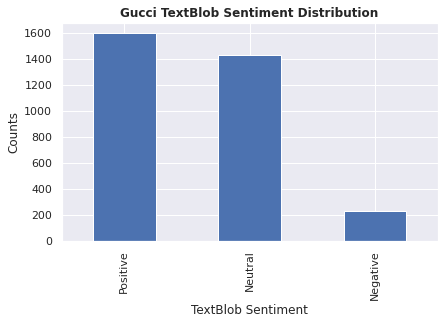

In [21]:
# TextBlob count for Gucci

# Show the gucci value counts
dftweets_gucci['textblob_analysis'].value_counts()

# Plot and visualize the counts
plt.title('Gucci TextBlob Sentiment Distribution', fontweight ='bold')
plt.xlabel('TextBlob Sentiment')
plt.ylabel('Counts')
dftweets_gucci['textblob_analysis'].value_counts().plot(kind='bar')
plt.show()

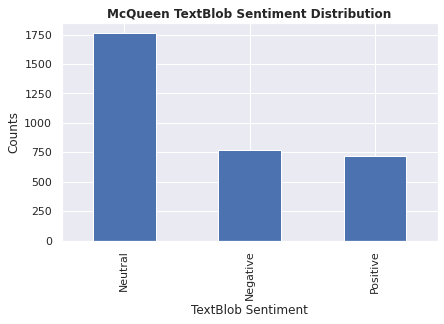

In [23]:
# TextBlob count for McQueen

# Show the gucci value counts
dftweets_mcqueen['textblob_analysis'].value_counts()

# Plot and visualize the counts
plt.title('McQueen TextBlob Sentiment Distribution', fontweight ='bold')
plt.xlabel('TextBlob Sentiment')
plt.ylabel('Counts')
dftweets_mcqueen['textblob_analysis'].value_counts().plot(kind='bar')
plt.show()

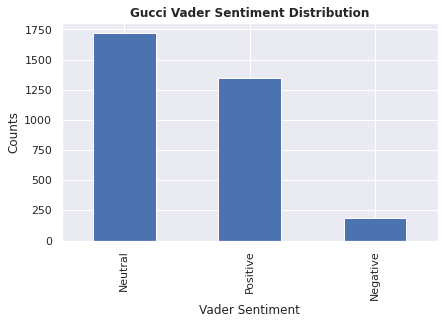

In [24]:
# VADER count for Gucci

# Show the gucci value counts
dftweets_gucci['vader_analysis'].value_counts()

# Plot and visualize the counts
plt.title('Gucci Vader Sentiment Distribution', fontweight ='bold')
plt.xlabel('Vader Sentiment')
plt.ylabel('Counts')
dftweets_gucci['vader_analysis'].value_counts().plot(kind='bar')
plt.show()

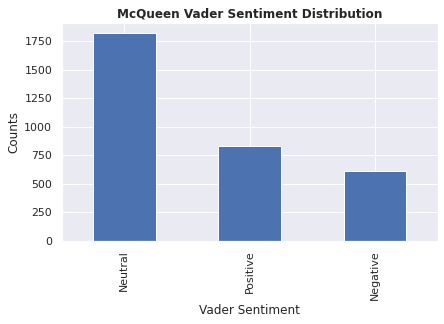

In [25]:
# VADER count for McQueen

# Show the gucci value counts
dftweets_mcqueen['vader_analysis'].value_counts()

# Plot and visualize the counts
plt.title('McQueen Vader Sentiment Distribution', fontweight ='bold')
plt.xlabel('Vader Sentiment')
plt.ylabel('Counts')
dftweets_mcqueen['vader_analysis'].value_counts().plot(kind='bar')
plt.show()

# **Word Frequency and Weight**

We can now perform words analysis on the dataset. As a reminder, it is composed of 2 x 3k tweets that have the following analysis: 

* **TextBlob**: Positive Speech, Neutral Speech, Negative Speech
* **VADER**: Positive Speech, Neutral Speech, Negative Speech

## **1.   Introduction: Importing libraries and Look at Data**



In [30]:
%%capture

# Install all needed libraries

!pip install tweet-preprocessor -qq
!pip install eli5 -qq
!pip install textstat -qq

In [31]:
%%capture

# Import all needed libraries
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from nltk.stem import WordNetLemmatizer, PorterStemmer

import preprocessor as prepro 
import spacy
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
# Have a look at the Dataset format
dftweets_gucci.head(2)

,brand,id,created_at,text,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound,textblob_analysis,vader_analysis
39217,Gucci,1458706068046065664,2021-11-11 08:00:02,minashin joins as new gucci global brand ambassador here the actress appears in a series of images wearing key p,0.484848,0.045455,20,113,0.0,1.0,0.0,0.0,Positive,Neutral
39218,Gucci,1458675864183484419,2021-11-11 06:00:01,joining gucci as new global brand ambassador is actress minashin captured by janghyunhong mina wears key looks,0.484848,0.045455,17,111,0.0,1.0,0.0,0.0,Positive,Neutral


In [33]:
# Encode Analysis values: 0 for Negative, 1 for Neutral and 2 for Positive
# Repeat the process for each Model and for each Brand 
dftweets_gucci['textblob_analysis'].replace({'Negative': 0, 'Neutral':1, 'Positive': 2}, inplace=True)
dftweets_gucci['vader_analysis'].replace({'Negative': 0, 'Neutral':1, 'Positive': 2}, inplace=True)

dftweets_mcqueen['textblob_analysis'].replace({'Negative': 0, 'Neutral':1, 'Positive': 2}, inplace=True)
dftweets_mcqueen['vader_analysis'].replace({'Negative': 0, 'Neutral':1, 'Positive': 2}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## **2. Reformat Data for the analysis**



In [34]:
# select only relevant columns - Gucci
dftweets_gucci['label'] = dftweets_gucci['textblob_analysis'] + dftweets_gucci['vader_analysis']
dftweets_gucci = dftweets_gucci[['label','text']]
dftweets_gucci.reset_index(inplace=True)
dftweets_gucci = dftweets_gucci.iloc[:,1:]

dftweets_gucci.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,text
0,3,minashin joins as new gucci global brand ambassador here the actress appears in a series of images wearing key p
1,3,joining gucci as new global brand ambassador is actress minashin captured by janghyunhong mina wears key looks
2,2,at the london premiere of and pinault all wore looks by gucci
3,2,captured at s tenth annual artfilm gala marcobizzarri michael govan amy sherald alessandromichele
4,3,the obama portraits features paintings of president barack obama and first lady michelle obama by kehinde wiley a


In [35]:
# select only relevant columns - McQueen
dftweets_mcqueen['label'] = dftweets_mcqueen['textblob_analysis'] + dftweets_mcqueen['vader_analysis']
dftweets_mcqueen = dftweets_mcqueen[['label','text']]
dftweets_mcqueen.reset_index(inplace=True)
dftweets_mcqueen = dftweets_mcqueen.iloc[:,1:]

dftweets_mcqueen.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,text
0,2,see workshops held by a team arts education and the mcqueen design team members throughout the pandemic a team art
1,4,we are pleased to announce our support for a team arts education a community youth arts education organisation in
2,4,an anemone print flower dress with exploded sleeves in rose gold poly faille discover the collectio
3,2,wearing a red exploded trapezeline dress with sculptural ruffle detailing antique si
4,3,a multizip exploded peplum biker jacket and a white full gathered skirt discover the collection


We now have five different labels which represent the fusion of TextBlob and VADER analysis:

* 0: Very Negative
* 1: Negative
* 2: Neutral
* 3: Positive
* 4: Very Positive

In [36]:
# Value counts by label for each Dataset

print(dftweets_gucci['label'].value_counts(normalize=True))
print(dftweets_mcqueen['label'].value_counts(normalize=True))

3    0.349846
2    0.326154
4    0.254769
1    0.056308
0    0.012923
Name: label, dtype: float64
2    0.439077
1    0.209846
3    0.197231
4    0.093231
0    0.060615
Name: label, dtype: float64


## **3.   Tokenizing & Removing Stop Words**



In [37]:
# assigning variables to essential columns
text_gucci = dftweets_gucci['text'] 
label_gucci = dftweets_gucci['label']

text_mcqueen = dftweets_mcqueen['text'] 
label_mcqueen = dftweets_mcqueen['label']

In [38]:
 # set stopwords
 stop_words = set(stopwords.words('english'))

In [39]:
 # function to tokenize tweets and remove stop words with NLTK built-in library
def process_tweet(text):
  tokens = nltk.word_tokenize(text)
  stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words] 
  return stopwords_removed

In [40]:
# Apply function
text_gucci = list(map(process_tweet, text_gucci))
text_mcqueen = list(map(process_tweet, text_mcqueen))

In [41]:
 # getting count of all unique words in the gucci corpus
total_vocab_gucci = set()
for comment in text_gucci:
  total_vocab_gucci.update(comment) 
len(total_vocab_gucci)

6423

In [42]:
 # getting count of all unique words in the mcqueen corpus
total_vocab_mcqueen = set()
for comment in text_mcqueen:
  total_vocab_mcqueen.update(comment) 
len(total_vocab_mcqueen)

3015

In [43]:
# transforming gucci corpus into a readable list
ff_gucci = [item for sublist in text_gucci for item in sublist] # getting frequency distribution
ff_gucci_freqdist = FreqDist(ff_gucci)
# top 10 words in cleaned corpus
ff_gucci_freqdist.most_common(10)

[('new', 750),
 ('gucci', 491),
 ('alessandromichele', 490),
 ('collection', 317),
 ('campaign', 301),
 ('captured', 198),
 ('show', 198),
 ('featuring', 197),
 ('wore', 172),
 ('bag', 167)]

In [44]:
# transforming mcqueen corpus into a readable list
ff_mcqueen = [item for sublist in text_mcqueen for item in sublist] # getting frequency distribution
ff_mcqueen_freqdist = FreqDist(ff_mcqueen)
# top 10 words in cleaned corpus
ff_mcqueen_freqdist.most_common(10)

[('dress', 1049),
 ('mcqueen', 712),
 ('alexander', 697),
 ('silk', 631),
 ('black', 629),
 ('jacket', 569),
 ('collection', 525),
 ('discover', 519),
 ('worn', 488),
 ('springsummer', 412)]

## **4.   Most Frequent Words for Each Classification**

To simplify the analysis let's group labels 0 & 1, and labels 3 & 4, to form a three categories scope: Negative, Neutral and Positive speech.

In [45]:
# creating new dfs for each classification
tf_gucci_neg = dftweets_gucci[(dftweets_gucci['label']==0) | (dftweets_gucci['label']==1)]
tf_gucci_neu = dftweets_gucci[dftweets_gucci['label']==2] 
tf_gucci_pos = dftweets_gucci[(dftweets_gucci['label']==3) | (dftweets_gucci['label']==4)] 

tf_mcqueen_neg = dftweets_mcqueen[(dftweets_mcqueen['label']==0) | (dftweets_mcqueen['label']==1)]
tf_mcqueen_neu = dftweets_mcqueen[dftweets_mcqueen['label']==2] 
tf_mcqueen_pos = dftweets_mcqueen[(dftweets_mcqueen['label']==3) | (dftweets_mcqueen['label']==4)] 

In [46]:
# pulling out the text data for the two corpus
data_gucci_neg = tf_gucci_neg['text'] 
data_gucci_neu = tf_gucci_neu['text'] 
data_gucci_pos = tf_gucci_pos['text'] 

data_mcqueen_neg = tf_mcqueen_neg['text'] 
data_mcqueen_neu = tf_mcqueen_neu['text'] 
data_mcqueen_pos = tf_mcqueen_pos['text'] 

In [47]:
# creating lists for processed data
process_gucci_neg = list(map(process_tweet, data_gucci_neg)) 
process_gucci_neu = list(map(process_tweet, data_gucci_neu)) 
process_gucci_pos = list(map(process_tweet, data_gucci_pos)) 

process_mcqueen_neg = list(map(process_tweet, data_mcqueen_neg)) 
process_mcqueen_neu = list(map(process_tweet, data_mcqueen_neu)) 
process_mcqueen_pos = list(map(process_tweet, data_mcqueen_pos)) 

In [48]:
# Most common negative words for gucci
ff_neg = [item for sublist in process_gucci_neg for item in sublist] 
ff_gucci_neg = FreqDist(ff_neg)

# Most common neutral words for gucci
ff_neu = [item for sublist in process_gucci_neu for item in sublist] 
ff_gucci_neu = FreqDist(ff_neu)

# Most common positive words for gucci
ff_pos = [item for sublist in process_gucci_pos for item in sublist] 
ff_gucci_pos = FreqDist(ff_pos)

In [49]:
# create counts of negative, neutral and positive with values and words
neg_bar_counts = [x[1] for x in ff_gucci_neg.most_common(20)] 
neg_bar_words = [x[0] for x in ff_gucci_neg.most_common(20)]

neu_bar_counts = [x[1] for x in ff_gucci_neu.most_common(20)] 
neu_bar_words = [x[0] for x in ff_gucci_neu.most_common(20)]

pos_bar_counts = [x[1] for x in ff_gucci_pos.most_common(20)] 
pos_bar_words = [x[0] for x in ff_gucci_pos.most_common(20)]

Text(0.5, 0.98, 'Gucci Top 20 Most Frequent Words per Label')

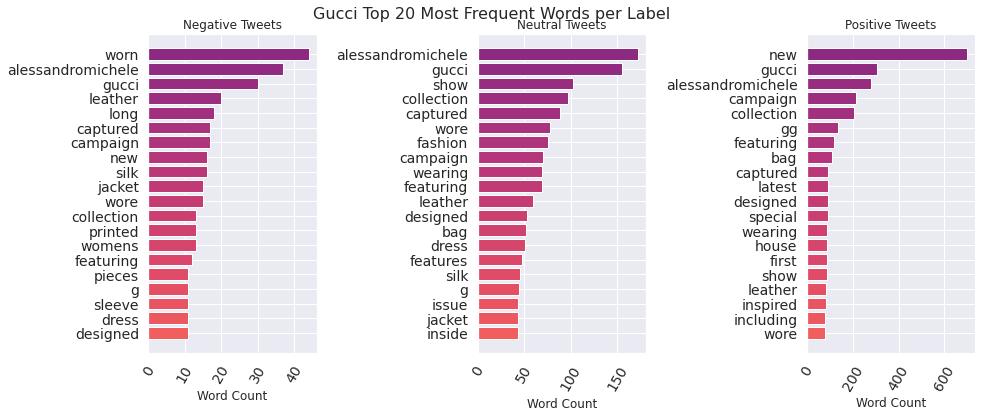

In [50]:
 # set the color of the bar graphs
from matplotlib import cm
color = cm.magma(np.linspace(.4,.8, 30))

new_figure = plt.figure(figsize=(14,6)) 

ax = new_figure.add_subplot(131)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(132)
ax2.invert_yaxis()

ax3 = new_figure.add_subplot(133)
ax3.invert_yaxis()

# generating a bar chart on each axes
ax.barh(neg_bar_words, neg_bar_counts, color=color)
ax2.barh(neu_bar_words, neu_bar_counts, color=color)
ax3.barh(pos_bar_words, pos_bar_counts, color=color)

ax.title.set_text('Negative Tweets') 
ax2.title.set_text('Neutral Tweets')
ax3.title.set_text('Positive Tweets')

for ax in new_figure.axes: 
  plt.sca(ax)
  plt.xticks(rotation=60, fontsize=14)
  plt.xlabel("Word Count")
  plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Gucci Top 20 Most Frequent Words per Label', fontsize=16)

In [51]:
# Most common negative words for mcqueen
ff_neg = [item for sublist in process_mcqueen_neg for item in sublist] 
ff_mcqueen_neg = FreqDist(ff_neg)

# Most common neutral words for mcqueen
ff_neu = [item for sublist in process_mcqueen_neu for item in sublist] 
ff_mcqueen_neu = FreqDist(ff_neu)

# Most common positive words for mcqueen
ff_pos = [item for sublist in process_mcqueen_pos for item in sublist] 
ff_mcqueen_pos = FreqDist(ff_pos)

In [52]:
# create counts of negative, neutral and positive with values and words
neg_bar_counts = [x[1] for x in ff_mcqueen_neg.most_common(20)] 
neg_bar_words = [x[0] for x in ff_mcqueen_neg.most_common(20)]

neu_bar_counts = [x[1] for x in ff_mcqueen_neu.most_common(20)] 
neu_bar_words = [x[0] for x in ff_mcqueen_neu.most_common(20)]

pos_bar_counts = [x[1] for x in ff_mcqueen_pos.most_common(20)] 
pos_bar_words = [x[0] for x in ff_mcqueen_pos.most_common(20)]

Text(0.5, 0.98, 'McQueen Top 20 Most Frequent Words per Label')

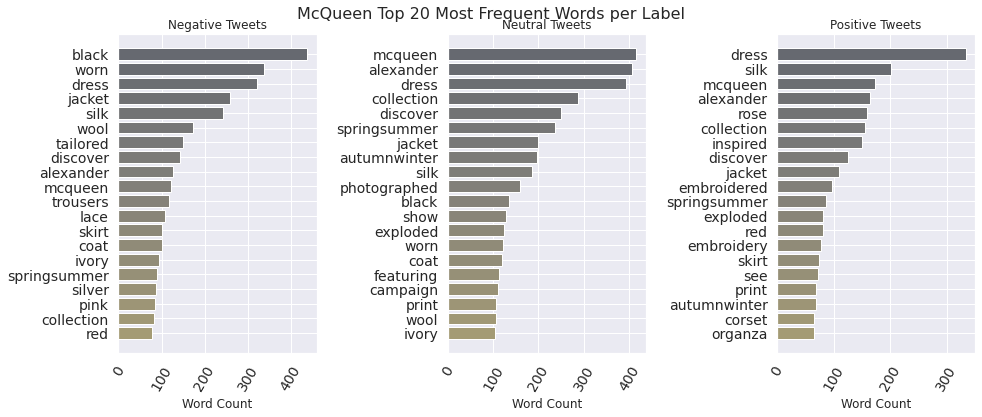

In [53]:
 # set the color of the bar graphs
from matplotlib import cm
color = cm.cividis(np.linspace(.4,.8, 30))

new_figure = plt.figure(figsize=(14,6)) 

ax = new_figure.add_subplot(131)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(132)
ax2.invert_yaxis()

ax3 = new_figure.add_subplot(133)
ax3.invert_yaxis()

# generating a bar chart on each axes
ax.barh(neg_bar_words, neg_bar_counts, color=color)
ax2.barh(neu_bar_words, neu_bar_counts, color=color)
ax3.barh(pos_bar_words, pos_bar_counts, color=color)

ax.title.set_text('Negative Tweets') 
ax2.title.set_text('Neutral Tweets')
ax3.title.set_text('Positive Tweets')

for ax in new_figure.axes: 
  plt.sca(ax)
  plt.xticks(rotation=60, fontsize=14)
  plt.xlabel("Word Count")
  plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('McQueen Top 20 Most Frequent Words per Label', fontsize=16)

## **7.   Weight of the words**

Here we do a quick analysis of the weights of each word in a single tweet.

In [ ]:
# Vectorizing gucci data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X_gucci = vectorizer.fit_transform(dftweets_gucci['text'])
y_gucci = dftweets_gucci['label'] 

In [ ]:
# Define gucci model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model_gucci = LogisticRegression() 
model_gucci.fit(X_train, y_train)
y_pred_gucci = model_gucci.predict(X_test)

In [ ]:
import eli5
eli5.show_weights(model_gucci, feature_names=vectorizer.get_feature_names(), target_names=['Very Negative','Negative','Neutral',
                                                                                     'Positive', 'Very Positive'], top=20)

In [ ]:
eli5.show_prediction(model_gucci, dftweets_gucci['text'][50], vec=vectorizer, target_names=['Very Negative','Negative','Neutral',
                                                                                     'Positive', 'Very Positive'])

In [ ]:
# Vectorizing mcqueen data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X_mcqueen = vectorizer.fit_transform(dftweets_mcqueen['text'])
y_mcqueen = dftweets_mcqueen['label'] 

In [ ]:
# Define mcqueen model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model_mcqueen = LogisticRegression() 
model_mcqueen.fit(X_train, y_train)
y_pred_mcqueen = model_mcqueen.predict(X_test)

In [ ]:
import eli5
eli5.show_weights(model_mcqueen, feature_names=vectorizer.get_feature_names(), target_names=['Very Negative','Negative','Neutral',
                                                                                     'Positive', 'Very Positive'], top=20)

In [ ]:
eli5.show_prediction(model_mcqueen, dftweets_mcqueen['text'][50], vec=vectorizer, target_names=['Very Negative','Negative','Neutral',
                                                                                     'Positive', 'Very Positive'])

# **Topic Modeling with LDA**

## **Import libraries and load data**

In [ ]:
# import necessary libraries
import pandas as pd
from datetime import datetime
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%%capture

# Install all needed libraries

!pip install pyLDAvis==2.1.2 -qq
!pip install gensim -qq

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Load and get only Gucci and McQueen Tweets
dftweets = pd.read_csv('/content/drive/MyDrive/Final Project/2. Sentiment Analysis/Tweet_Posts.csv')

dftweets_gucci = dftweets[dftweets['brand']=='Gucci']
dftweets_mcqueen = dftweets[dftweets['brand']=='McQueen']

# only the relevent columns
dftweets_gucci = dftweets_gucci.iloc[:, [3,4,5]]
dftweets_mcqueen = dftweets_mcqueen.iloc[:, [3,4,5]]

In [ ]:
dftweets_gucci.replace(np.nan,'',inplace=True)

## **Preparing the Data**

In [ ]:
stopwords = stopwords.words("english")

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_gucci = lemmatization(dftweets_gucci['text'])
lemmatized_mcqueen = lemmatization(dftweets_mcqueen['text'])
print(lemmatized_gucci[0][0:90])

join brand ambassador here actress appear series image wear key p


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

gucci_words = gen_words(lemmatized_gucci)
mcqueen_words = gen_words(lemmatized_mcqueen)

print(gucci_words[0][0:20])

['join', 'brand', 'ambassador', 'here', 'actress', 'appear', 'series', 'image', 'wear', 'key']


In [ ]:
id2word_gucci = corpora.Dictionary(gucci_words)

corpus_gucci = []
for text in gucci_words:
    new = id2word_gucci.doc2bow(text)
    corpus_gucci.append(new)

print(corpus_gucci[0][0:20])

word_gucci = id2word_gucci[[0][:1][0]]
print(word_gucci)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
actress


In [ ]:
id2word_mcqueen = corpora.Dictionary(mcqueen_words)

corpus_mcqueen = []
for text in mcqueen_words:
    new = id2word_mcqueen.doc2bow(text)
    corpus_mcqueen.append(new)

print(corpus_mcqueen[0][0:20])

word_mcqueen = id2word_mcqueen[[0][:1][0]]
print(word_mcqueen)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1)]
art


In [ ]:
lda_model_gucci = gensim.models.ldamodel.LdaModel(corpus=corpus_gucci,
                                           id2word=id2word_gucci,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
lda_model_mcqueen = gensim.models.ldamodel.LdaModel(corpus=corpus_mcqueen,
                                           id2word=id2word_mcqueen,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

## **Vizualizing the Data**

In [ ]:
# Gucci Topic Modeling visualization
pyLDAvis.enable_notebook()
vis_gucci = pyLDAvis.gensim.prepare(lda_model_gucci, corpus_gucci, id2word_gucci, mds="mmds", R=30)
vis_gucci

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.482361  0.144706       1        1  7.558270
6      0.154981 -0.459568       2        1  5.245061
27     0.426967  0.183591       3        1  5.166150
7      0.244436  0.183673       4        1  4.414122
22     0.407919 -0.113831       5        1  3.998498
14    -0.020487 -0.431450       6        1  3.958303
13    -0.304714  0.349824       7        1  3.780156
26     0.447422  0.021581       8        1  3.694839
5     -0.398500 -0.193928       9        1  3.469229
16    -0.422570 -0.041251      10        1  3.431083
18    -0.048942  0.192672      11        1  3.429868
11    -0.158028 -0.402490      12        1  3.411042
3     -0.290270 -0.306347      13        1  3.279400
4      0.245090 -0.005841      14        1  3.245893
19     0.041305  0.431730      15        1  3.209934
23     0.354824 -0.236638      16        1  3.200317
25     0.198632 -0.199276      17        1  3.059272
17    -0.309835  0.177392      18        1  2.929705
0     -0.105577 -0.117553      19        1  2.892145
8      0.084649  0.272697      20        1  2.807258
28     0.188188  0.367657      21        1  2.690441
21    -0.151761  0.274400      22        1  2.679276
10    -0.105711  0.403708      23        1  2.600376
29     0.219957 -0.315682      24        1  2.550952
9      0.297120  0.265395      25        1  2.508515
24    -0.167215 -0.231992      26        1  2.264203
1      0.030631 -0.235531      27        1  2.188949
20    -0.277696 -0.026894      28        1  2.165824
15     0.051458 -0.012441      29        1  2.126661
2     -0.149911  0.061687      30        1  2.044259, topic_info=             Term        Freq       Total Category  logprob  loglift
13            new  666.000000  666.000000  Default  30.0000  30.0000
18        feature  450.000000  450.000000  Default  29.0000  29.0000
47       campaign  343.000000  343.000000  Default  28.0000  28.0000
9            wear  357.000000  357.000000  Default  27.0000  27.0000
238        design  254.000000  254.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1139      reflect    3.800572    4.619537  Topic30  -4.8979   3.6950
2936  preparation    3.661794    4.480759  Topic30  -4.9351   3.6883
1425    naturally    3.573239    4.392204  Topic30  -4.9596   3.6838
554        marble    3.542543    4.361508  Topic30  -4.9682   3.6822
4008          rec    3.518896    4.337886  Topic30  -4.9749   3.6809

[946 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2348     23  0.950417   absolute
4030      6  0.858751     accept
296       2  0.990882  accessory
3638     11  0.942172    acetate
1301     12  0.968357        act
...     ...       ...        ...
1464     23  0.900465      write
802      20  0.942142     writer
103      27  0.966387       year
1540     13  0.853553     yellow
2126     14  0.907963      young

[916 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 7, 28, 8, 23, 15, 14, 27, 6, 17, 19, 12, 4, 5, 20, 24, 26, 18, 1, 9, 29, 22, 11, 30, 10, 25, 2, 21, 16, 3])

In [ ]:
# McQueen Topic Modeling visualization
pyLDAvis.enable_notebook()
vis_mcqueen = pyLDAvis.gensim.prepare(lda_model_mcqueen, corpus_mcqueen, id2word_mcqueen, mds="mmds", R=30)
vis_mcqueen

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.450071 -0.220731       1        1  9.004256
16     0.053364 -0.496714       2        1  8.675006
27    -0.509122 -0.006913       3        1  6.948014
5      0.384022 -0.267629       4        1  4.416722
10     0.458866 -0.141309       5        1  3.759330
17     0.483229  0.056945       6        1  3.691151
26     0.423379  0.261377       7        1  3.577908
18     0.155157 -0.395469       8        1  3.518920
12    -0.325375 -0.319109       9        1  3.454696
14    -0.214016 -0.405974      10        1  3.411124
2     -0.374709 -0.025871      11        1  3.308138
4     -0.438450  0.188050      12        1  3.282783
7     -0.043164  0.008681      13        1  3.206095
21    -0.082861 -0.432965      14        1  3.151443
8      0.119794  0.470552      15        1  2.828747
13    -0.187074  0.285726      16        1  2.822798
9     -0.338508  0.337053      17        1  2.815421
11    -0.216932 -0.162081      18        1  2.767679
20    -0.027459 -0.197752      19        1  2.766563
1      0.273690 -0.334192      20        1  2.400137
22     0.137678 -0.175107      21        1  2.392854
28     0.142191  0.335655      22        1  2.358702
19    -0.265915  0.129474      23        1  2.318823
23    -0.009535  0.170689      24        1  2.226319
29    -0.150252  0.404105      25        1  2.225154
0     -0.032209  0.453695      26        1  1.934813
3      0.207246 -0.016433      27        1  1.825123
24     0.358780  0.026290      28        1  1.814446
25     0.193530  0.169828      29        1  1.810718
15     0.274723  0.300128      30        1  1.286117, topic_info=            Term         Freq        Total Category  logprob  loglift
82          silk   615.000000   615.000000  Default  30.0000  30.0000
29          wear   832.000000   832.000000  Default  29.0000  29.0000
18         dress  1050.000000  1050.000000  Default  28.0000  28.0000
73         black   532.000000   532.000000  Default  27.0000  27.0000
264   photograph   337.000000   337.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
912      concert     3.011328     3.936368  Topic30  -4.8098   4.0857
1823  harrystyle     2.938648     3.863688  Topic30  -4.8342   4.0799
1824  liveontour     2.938648     3.863688  Topic30  -4.8342   4.0799
1989       haute     2.860957     3.786005  Topic30  -4.8610   4.0734
1988  generation     2.860957     3.786005  Topic30  -4.8610   4.0734

[960 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2090      8  0.959636        aca
1642      8  0.868674       acce
2075     19  0.926414   adjustab
1789     18  0.926452  adutakech
1347      5  0.826076      ahead
...     ...       ...        ...
1950     13  0.806945       yarn
148      20  0.818723     yellow
1840      4  0.836176  yesterday
2021     29  0.922028      young
72       29  0.965623        zip

[939 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 17, 28, 6, 11, 18, 27, 19, 13, 15, 3, 5, 8, 22, 9, 14, 10, 12, 21, 2, 23, 29, 20, 24, 30, 1, 4, 25, 26, 16])